In [19]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [66]:
dfx_train = pd.read_csv('./Training Data/Diabetes_XTrain.csv')
dfy_train = pd.read_csv('./Training Data/Diabetes_YTrain.csv')
dfx_test = pd.read_csv('./Testing Data/Diabetes_Xtest.csv')
dfx_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23
...,...,...,...,...,...,...,...,...
571,2,111,60,0,0,26.2,0.343,23
572,7,187,68,39,304,37.7,0.254,41
573,2,122,60,18,106,29.8,0.717,22
574,4,154,72,29,126,31.3,0.338,37


In [21]:
X_train = dfx_train.values
Y_train = dfy_train.values
Y_train = Y_train.reshape((-1,))

In [22]:
X_test = dfx_test.values
X_train.shape

(576, 8)

In [42]:
def distance(x1, x2):
    return np.sqrt(sum((x1 - x2)**2))

def KNN(X, Y, Querypt, k=5):
    v = []
    for i in range(X.shape[0]):
        d = distance(Querypt, X[i])
        v.append((d, Y[i]))
    
    v = sorted(v)
    v = v[:k]
    v = np.array(v)
    u = np.unique(v[:,1], return_counts=True)
    
    index = u[1].argmax()
    pred = u[0][index]
    
    return pred

In [72]:
y1 = KNN(X_train,Y_train, X_test[0], 23)
y2 = KNN(X_train,Y_train, X_test[100], 23)

In [74]:
print(y1)
print(y2)

0.0
1.0


In [69]:
dfx_train['Class'] = pd.Series(Y_train, index=dfx_train.index)

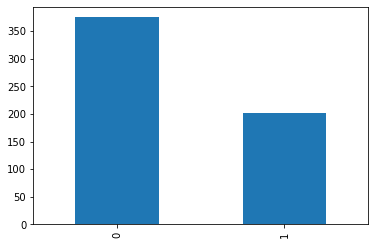

In [71]:
dfx_train['Class'].value_counts().plot.bar()

In [76]:
predictions = []
for i in range(X_test.shape[0]):
    predictions.append(KNN(X_train,Y_train, X_test[i], 23))

In [79]:
predictions = np.array(predictions)

In [81]:
dfx_test['Class'] = pd.Series(predictions, index=dfx_test.index)

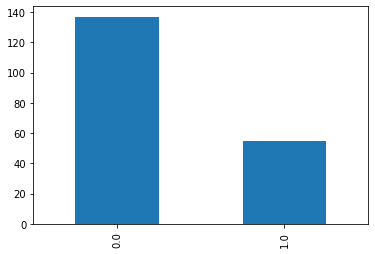

In [82]:
dfx_test['Class'].value_counts().plot.bar()